# Q3:
## You are requested to get the TTS curve of a PP-HDPE Copolymer (MFI of 2 g/10 min) and its composite loaded with 3% of CNT to get their complex viscosity curves at 195°C.   Also, using the master curve of the G”(ω) you are requested to get the First normal stress difference at steady state. Make any comments/observations you consider important. (20 pts)
---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.linear_model import LinearRegression

---
### Let's read and look at the provided data

In [2]:
df = pd.read_csv("./PPHDPEandComposites_data.csv", delimiter=",");

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

./data.csv


,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus
0,628.0,92400,124000,628.0,87600,21.717405,515.174657,112000,628.0,79400,98200,628.0,61200,153000,628.0,61400,27.256410,2003.813948,142000,628.0,59900,138000
1,628.0,92300,122000,628.0,87600,48.560043,435.208292,111000,628.0,79400,96900,628.0,61000,151000,628.0,60800,60.966959,1204.532913,141000,628.0,59100,135000
2,518.0,87100,109000,518.0,81300,109.500057,308.622497,96400,518.0,74300,84500,518.0,59300,142000,518.0,59200,137.084299,701.660492,132000,518.0,56300,123000
3,373.0,78500,91600,373.0,72500,246.859922,207.468639,79800,373.0,65800,69100,373.0,56900,129000,373.0,57000,306.445268,414.283938,119000,373.0,53600,111000
4,268.0,70700,77100,268.0,64500,580.884916,119.308449,66400,268.0,58100,56900,268.0,54900,117000,268.0,54900,708.881090,221.700825,107000,268.0,51100,99000


---
### Calculate:
### $$ tan \delta = \frac{G^{\prime\prime}(\omega)}{G^{\prime}(\omega)} $$

In [3]:
def _tand(G1, G2):
    tand = G2 / G1;
    return tand;

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Compute tan d
        df[sample_id + "_tanDelta"] = _tand(df[sample_id + "_experiment_storageModulus"], df[sample_id + "_experiment_lossModulus"]);

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

./data.csv


,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_tanDelta,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_tanDelta,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_tanDelta,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_tanDelta,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_tanDelta,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_tanDelta
0,628.0,92400,124000,0.745161,628.0,87600,21.717405,515.174657,112000,0.782143,628.0,79400,98200,0.808554,628.0,61200,153000,0.400000,628.0,61400,27.256410,2003.813948,142000,0.432394,628.0,59900,138000,0.434058
1,628.0,92300,122000,0.756557,628.0,87600,48.560043,435.208292,111000,0.789189,628.0,79400,96900,0.819401,628.0,61000,151000,0.403974,628.0,60800,60.966959,1204.532913,141000,0.431206,628.0,59100,135000,0.437778
2,518.0,87100,109000,0.799083,518.0,81300,109.500057,308.622497,96400,0.843361,518.0,74300,84500,0.879290,518.0,59300,142000,0.417606,518.0,59200,137.084299,701.660492,132000,0.448485,518.0,56300,123000,0.457724
3,373.0,78500,91600,0.856987,373.0,72500,246.859922,207.468639,79800,0.908521,373.0,65800,69100,0.952243,373.0,56900,129000,0.441085,373.0,57000,306.445268,414.283938,119000,0.478992,373.0,53600,111000,0.482883
4,268.0,70700,77100,0.916991,268.0,64500,580.884916,119.308449,66400,0.971386,268.0,58100,56900,1.021090,268.0,54900,117000,0.469231,268.0,54900,708.881090,221.700825,107000,0.513084,268.0,51100,99000,0.516162


---
### Plot $tan \delta$ vs. frequency for each $T$

In [4]:
def plot_eachTemperatureCurve(pltname, x_name, x_units, y_name, y_units):

    # Set plot size and axis labels' font size
    #pltname = "loss tangent vs frequency (raw)";
    scale   = 6;
    fig     = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15);
    plt.rc('ytick', labelsize=15);
    plt.tight_layout();
    
    # Stablish the plot area
    ax0 = plt.gca();

    # Iterate the data per sample
    sample_id = '';
    for i in range(len(df.columns)):
        
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Define x and y axis
        if "190_experiment_shearRate" in df.columns[i]:
            y_str = sample_id + "_experiment_shearViscosity";
            if "_complexViscosity" in y_name:
                x_str = sample_id + "_experiment_shearRate";
            if "_shiftedTo195_ComplexViscosity" in y_name:
                x_str = sample_id + "_shiftedTo195_ShearRate";
        else:
            x_str = sample_id + x_name; # x_units = r'$[\frac{1}{s}]$';
            y_str = sample_id + y_name; # y_units = '';
        
        try:
            # Remove NANs from interesting x,y data
            df_fil = pd.DataFrame(df);
            df_fil = df_fil.dropna(subset=[x_str, y_str]);

            # Extract data from a specific country
            x  = df_fil.iloc[:][x_str];
            y = df_fil.iloc[:][y_str];

            if ("_angularFrequency" in df.columns[i]):
                # Scatter the data and plot a curve to join the points
                plt.scatter(x, y, s=45, marker='o', label=sample_id);
                plt.plot(x, y, linewidth=1, linestyle='-.');
        except:
            continue
            
        if "190_experiment_shearRate" in df.columns[i] and "omplexViscosity" in y_name:
            # Scatter the data and plot a curve to join the points
            plt.scatter(x, y, s=45, marker='o', label=sample_id + ".");
            plt.plot(x, y, linewidth=1, linestyle='-.');

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    # fig.autofmt_xdate();
    ax0.set_xlabel(x_name + '    ' + x_units, fontsize=24);
    ax0.set_ylabel(y_name + '    ' + y_units, fontsize=24);

    for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
    for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
    ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

    # Display main plot
    plt.yscale('log');
    plt.xscale('log');
    plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
    plt.title(pltname, size=24);
    plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

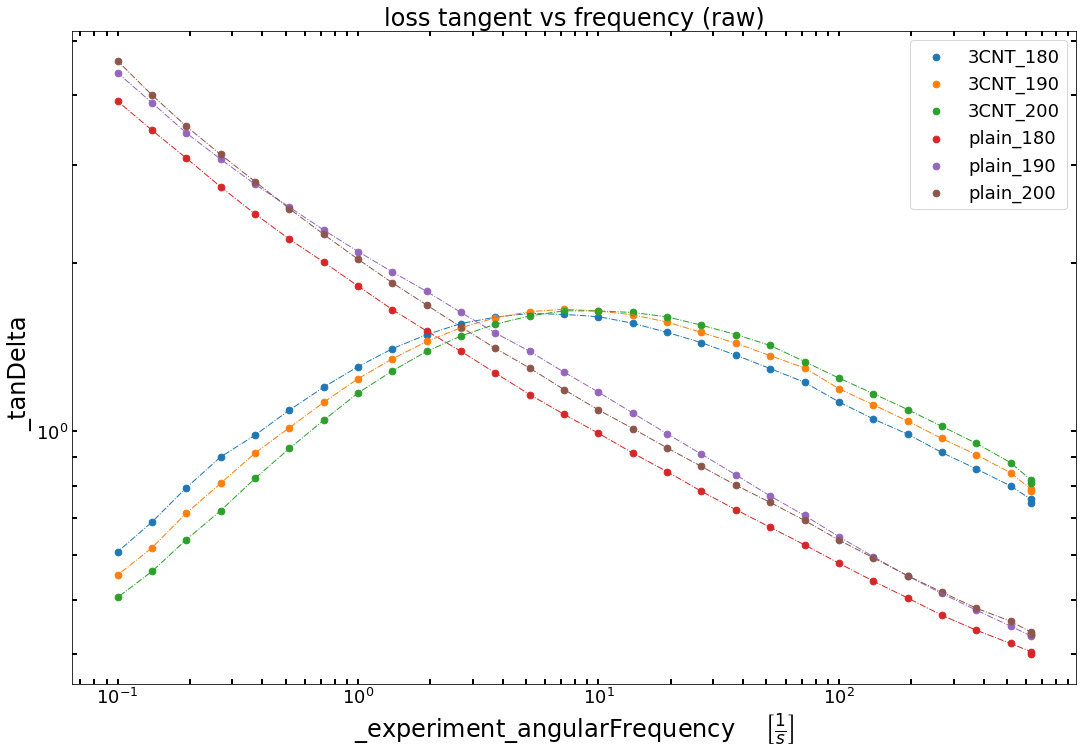

In [5]:
plot_eachTemperatureCurve(
    "loss tangent vs frequency (raw)",
    "_experiment_angularFrequency", r'$\left[ \frac{1}{s} \right]$',
    "_tanDelta", '')

---
### Manually shift the curves to obtain the horizontal shift factor $a_T$
### Let's use $T_{ref} = 200°C$ as the reference temperature

./data.csv


,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_shiftedTo200_AngularFrequency,3CNT_180_tanDelta,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_shiftedTo200_AngularFrequency,3CNT_190_tanDelta,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_shiftedTo200_AngularFrequency,3CNT_200_tanDelta,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_shiftedTo200_AngularFrequency,plain_180_tanDelta,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_shiftedTo200_AngularFrequency,plain_190_tanDelta,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_shiftedTo200_AngularFrequency,plain_200_tanDelta
0,628.0,92400,124000,1036.20,0.745161,628.0,87600,21.717405,515.174657,112000,722.20,0.782143,628.0,79400,98200,628.0,0.808554,628.0,61200,153000,967.12,0.400000,628.0,61400,27.256410,2003.813948,142000,690.8,0.432394,628.0,59900,138000,628.0,0.434058
1,628.0,92300,122000,1036.20,0.756557,628.0,87600,48.560043,435.208292,111000,722.20,0.789189,628.0,79400,96900,628.0,0.819401,628.0,61000,151000,967.12,0.403974,628.0,60800,60.966959,1204.532913,141000,690.8,0.431206,628.0,59100,135000,628.0,0.437778
2,518.0,87100,109000,854.70,0.799083,518.0,81300,109.500057,308.622497,96400,595.70,0.843361,518.0,74300,84500,518.0,0.879290,518.0,59300,142000,797.72,0.417606,518.0,59200,137.084299,701.660492,132000,569.8,0.448485,518.0,56300,123000,518.0,0.457724
3,373.0,78500,91600,615.45,0.856987,373.0,72500,246.859922,207.468639,79800,428.95,0.908521,373.0,65800,69100,373.0,0.952243,373.0,56900,129000,574.42,0.441085,373.0,57000,306.445268,414.283938,119000,410.3,0.478992,373.0,53600,111000,373.0,0.482883
4,268.0,70700,77100,442.20,0.916991,268.0,64500,580.884916,119.308449,66400,308.20,0.971386,268.0,58100,56900,268.0,1.021090,268.0,54900,117000,412.72,0.469231,268.0,54900,708.881090,221.700825,107000,294.8,0.513084,268.0,51100,99000,268.0,0.516162


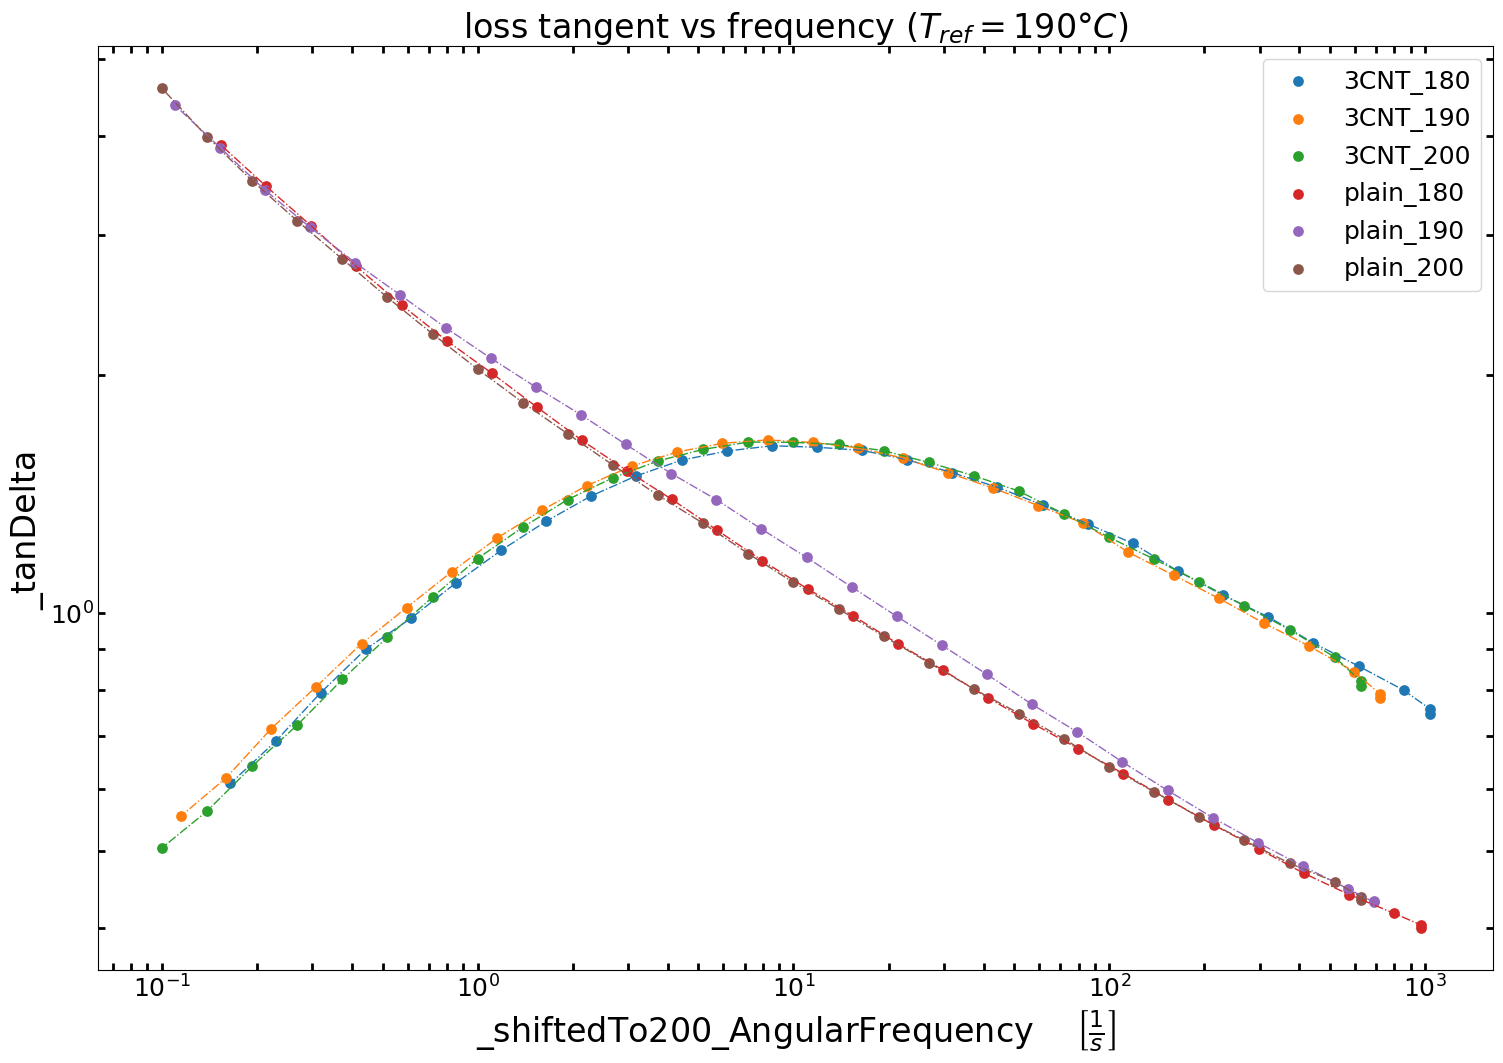

In [6]:
# a_T was manually tuned until TTS
a_T = pd.Series([1.65, 1.15, 1.00, 1.54, 1.10, 1.00]);

# Iterate the data per sample
sample_id = '';
sample_cnt = 0;
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Compute tan d
        df[sample_id + "_shiftedTo200_AngularFrequency"] = df[sample_id + "_experiment_angularFrequency"] * a_T[sample_cnt];
        
        sample_cnt = sample_cnt + 1;

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

plot_eachTemperatureCurve(
    "loss tangent vs frequency (" + r'$T_{ref} = 190°C$' + ")",
    "_shiftedTo200_AngularFrequency", r'$\left[ \frac{1}{s} \right]$',
    "_tanDelta", '')

---
### Compute
### $$ G^*(\omega) = {\left[ {G^{\prime\prime}(\omega)}^2 + {G^{\prime}(\omega)}^2 \right]}^{0.5} $$

In [7]:
def _Gc(G1, G2):
    Gc = np.sqrt(G2**2 + G1**2);
    return Gc;

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Compute tan d
        df[sample_id + "_complexModulus"] = _Gc(df[sample_id + "_experiment_storageModulus"], df[sample_id + "_experiment_lossModulus"]);

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

./data.csv


,3CNT_180_complexModulus,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_shiftedTo200_AngularFrequency,3CNT_180_tanDelta,3CNT_190_complexModulus,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_shiftedTo200_AngularFrequency,3CNT_190_tanDelta,3CNT_200_complexModulus,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_shiftedTo200_AngularFrequency,3CNT_200_tanDelta,plain_180_complexModulus,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_shiftedTo200_AngularFrequency,plain_180_tanDelta,plain_190_complexModulus,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_shiftedTo200_AngularFrequency,plain_190_tanDelta,plain_200_complexModulus,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_shiftedTo200_AngularFrequency,plain_200_tanDelta
0,154640.744954,628.0,92400,124000,1036.20,0.745161,142189.169770,628.0,87600,21.717405,515.174657,112000,722.20,0.782143,126283.807355,628.0,79400,98200,628.0,0.808554,164786.043098,628.0,61200,153000,967.12,0.400000,154706.043838,628.0,61400,27.256410,2003.813948,142000,690.8,0.432394,150439.389789,628.0,59900,138000,628.0,0.434058
1,152981.338731,628.0,92300,122000,1036.20,0.756557,141402.828826,628.0,87600,48.560043,435.208292,111000,722.20,0.789189,125275.576231,628.0,79400,96900,628.0,0.819401,162855.764405,628.0,61000,151000,967.12,0.403974,153550.122110,628.0,60800,60.966959,1204.532913,141000,690.8,0.431206,147369.637307,628.0,59100,135000,628.0,0.437778
2,139525.660722,518.0,87100,109000,854.70,0.799083,126105.709625,518.0,81300,109.500057,308.622497,96400,595.70,0.843361,112519.953786,518.0,74300,84500,518.0,0.879290,153884.664603,518.0,59300,142000,797.72,0.417606,144667.342548,518.0,59200,137.084299,701.660492,132000,569.8,0.448485,135272.650599,518.0,56300,123000,518.0,0.457724
3,120635.028081,373.0,78500,91600,615.45,0.856987,107816.000668,373.0,72500,246.859922,207.468639,79800,428.95,0.908521,95417.241629,373.0,65800,69100,373.0,0.952243,140991.524568,373.0,56900,129000,574.42,0.441085,131946.959040,373.0,57000,306.445268,414.283938,119000,410.3,0.478992,123263.782191,373.0,53600,111000,373.0,0.482883
4,104608.317069,268.0,70700,77100,442.20,0.916991,92570.027547,268.0,64500,580.884916,119.308449,66400,308.20,0.971386,81321.706819,268.0,58100,56900,268.0,1.021090,129240.125348,268.0,54900,117000,412.72,0.469231,120262.255093,268.0,54900,708.881090,221.700825,107000,294.8,0.513084,111410.098286,268.0,51100,99000,268.0,0.516162


---
### Plot $\tan \delta$ vs. $G^*(\omega)$ for each $T$

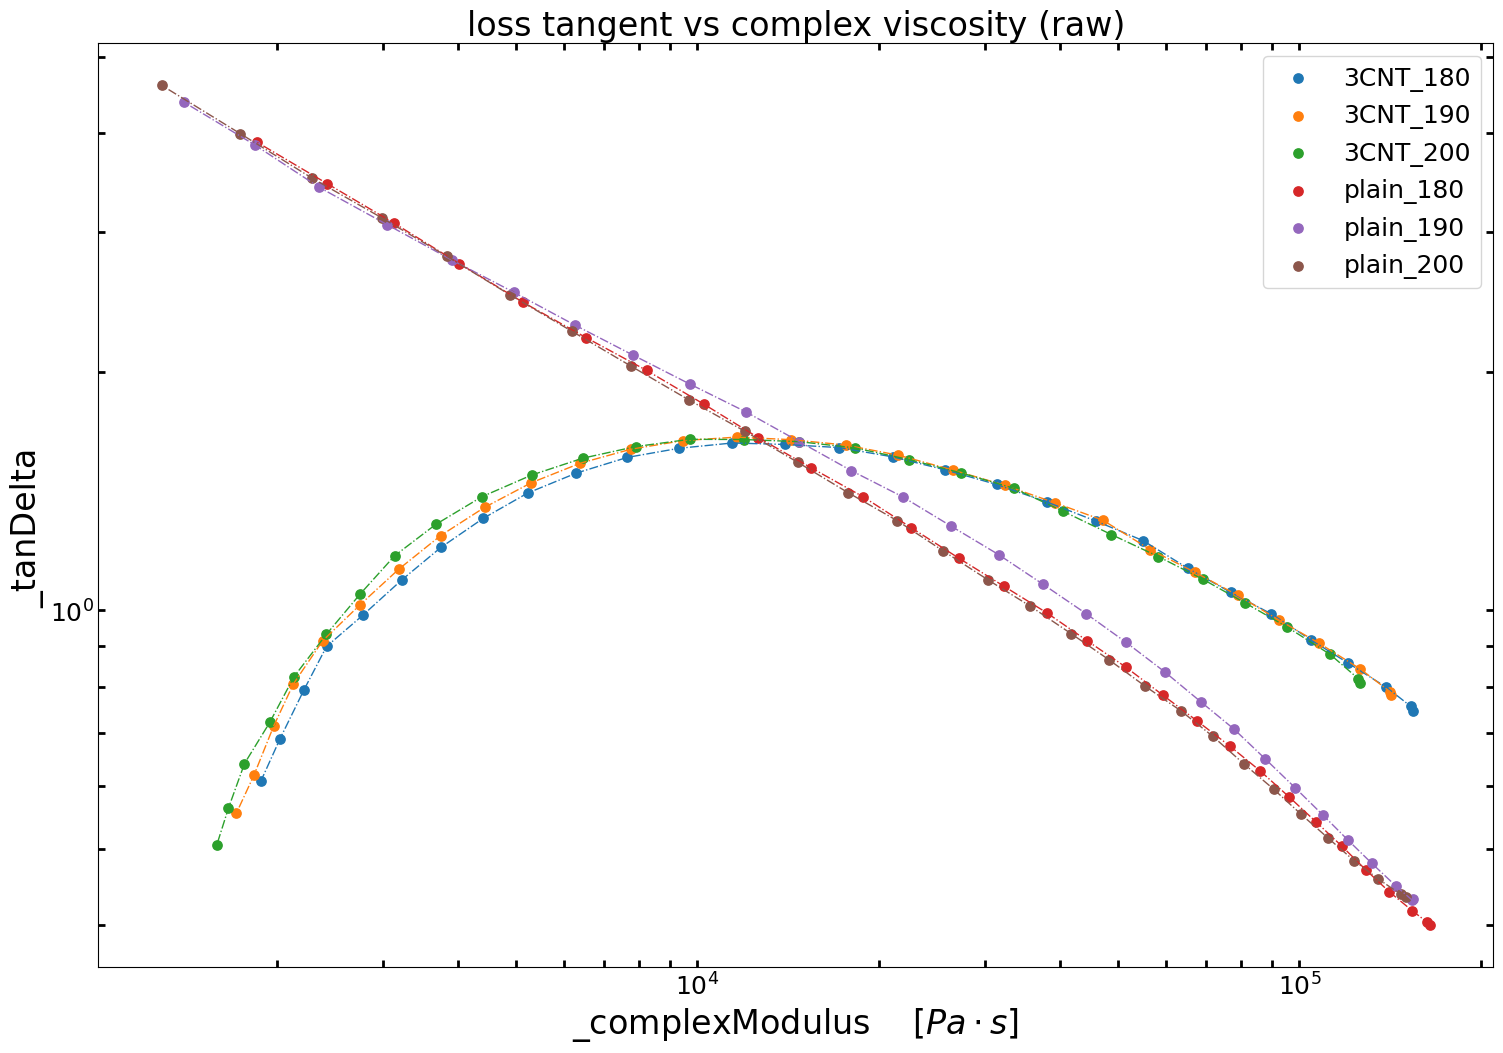

In [8]:
plot_eachTemperatureCurve(
    "loss tangent vs complex viscosity (raw)",
    "_complexModulus", r'$\left[ Pa \cdot s \right]$',
    "_tanDelta", '')

---
### Manually shift the curves to obtain the vertical shift factor $b_T$
### Let's use $T_{ref} = 200C$ as the reference temperature as the shear viscosity data is given at that temperature

./data.csv


,3CNT_180_complexModulus,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_shiftedTo200_AngularFrequency,3CNT_180_shiftedTo200_ComplexModulus,3CNT_180_tanDelta,3CNT_190_complexModulus,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_shiftedTo200_AngularFrequency,3CNT_190_shiftedTo200_ComplexModulus,3CNT_190_tanDelta,3CNT_200_complexModulus,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_shiftedTo200_AngularFrequency,3CNT_200_shiftedTo200_ComplexModulus,3CNT_200_tanDelta,plain_180_complexModulus,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_shiftedTo200_AngularFrequency,plain_180_shiftedTo200_ComplexModulus,plain_180_tanDelta,plain_190_complexModulus,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_shiftedTo200_AngularFrequency,plain_190_shiftedTo200_ComplexModulus,plain_190_tanDelta,plain_200_complexModulus,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_shiftedTo200_AngularFrequency,plain_200_shiftedTo200_ComplexModulus,plain_200_tanDelta
0,154640.744954,628.0,92400,124000,1036.20,146908.707707,0.745161,142189.169770,628.0,87600,21.717405,515.174657,112000,722.20,127970.252793,0.782143,126283.807355,628.0,79400,98200,628.0,126283.807355,0.808554,164786.043098,628.0,61200,153000,967.12,164786.043098,0.400000,154706.043838,628.0,61400,27.256410,2003.813948,142000,690.8,154706.043838,0.432394,150439.389789,628.0,59900,138000,628.0,150439.389789,0.434058
1,152981.338731,628.0,92300,122000,1036.20,145332.271795,0.756557,141402.828826,628.0,87600,48.560043,435.208292,111000,722.20,127262.545943,0.789189,125275.576231,628.0,79400,96900,628.0,125275.576231,0.819401,162855.764405,628.0,61000,151000,967.12,162855.764405,0.403974,153550.122110,628.0,60800,60.966959,1204.532913,141000,690.8,153550.122110,0.431206,147369.637307,628.0,59100,135000,628.0,147369.637307,0.437778
2,139525.660722,518.0,87100,109000,854.70,132549.377686,0.799083,126105.709625,518.0,81300,109.500057,308.622497,96400,595.70,113495.138662,0.843361,112519.953786,518.0,74300,84500,518.0,112519.953786,0.879290,153884.664603,518.0,59300,142000,797.72,153884.664603,0.417606,144667.342548,518.0,59200,137.084299,701.660492,132000,569.8,144667.342548,0.448485,135272.650599,518.0,56300,123000,518.0,135272.650599,0.457724
3,120635.028081,373.0,78500,91600,615.45,114603.276677,0.856987,107816.000668,373.0,72500,246.859922,207.468639,79800,428.95,97034.400601,0.908521,95417.241629,373.0,65800,69100,373.0,95417.241629,0.952243,140991.524568,373.0,56900,129000,574.42,140991.524568,0.441085,131946.959040,373.0,57000,306.445268,414.283938,119000,410.3,131946.959040,0.478992,123263.782191,373.0,53600,111000,373.0,123263.782191,0.482883
4,104608.317069,268.0,70700,77100,442.20,99377.901216,0.916991,92570.027547,268.0,64500,580.884916,119.308449,66400,308.20,83313.024792,0.971386,81321.706819,268.0,58100,56900,268.0,81321.706819,1.021090,129240.125348,268.0,54900,117000,412.72,129240.125348,0.469231,120262.255093,268.0,54900,708.881090,221.700825,107000,294.8,120262.255093,0.513084,111410.098286,268.0,51100,99000,268.0,111410.098286,0.516162


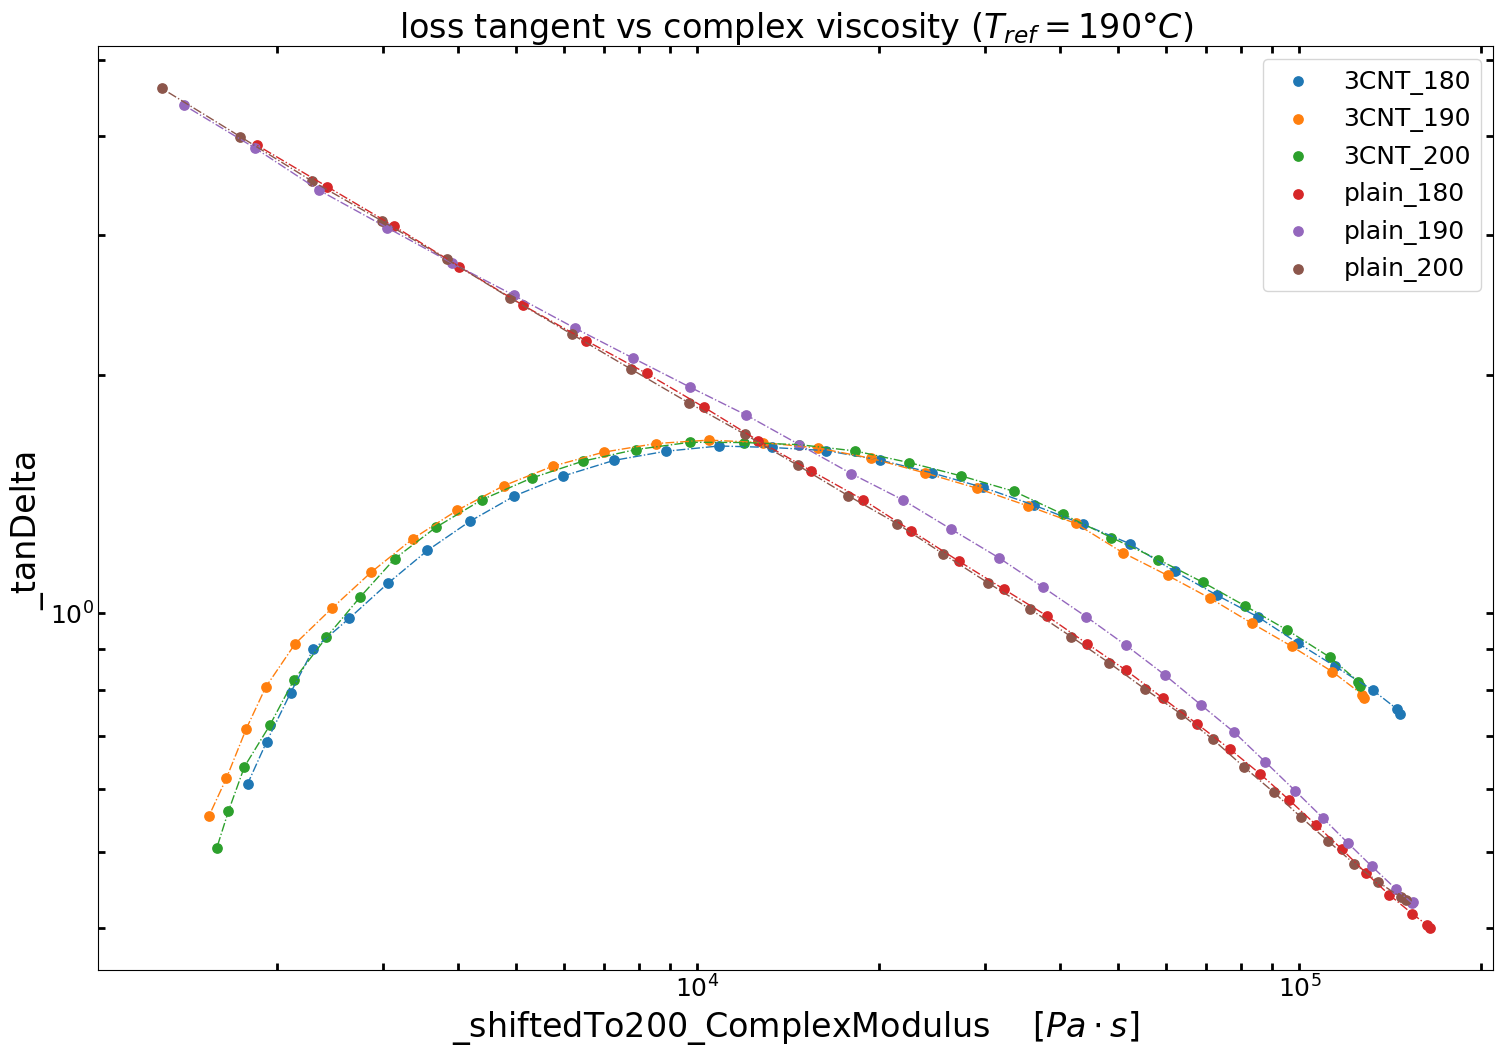

In [9]:
# b_T was manually tuned until TTS
b_T = pd.Series([0.95, 0.90, 1.00, 1.00, 1.00, 1.00]);

# Iterate the data per sample
sample_id = '';
sample_cnt = 0;
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Compute tan d
        df[sample_id + "_shiftedTo200_ComplexModulus"] = df[sample_id + "_complexModulus"] * b_T[sample_cnt];
        
        sample_cnt = sample_cnt + 1;

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

plot_eachTemperatureCurve(
    "loss tangent vs complex viscosity (" + r'$T_{ref} = 190°C$' + ")",
    "_shiftedTo200_ComplexModulus", r'$\left[ Pa \cdot s \right]$',
    "_tanDelta", '')

---
### Get the activation energy $E_H$ and $E_V$ $$ \log a_T \textit{ & } \log b_T  \ vs.\  \left( \frac{1}{T} - \frac{1}{T_0} \right) $$

In [10]:
def _invT(T, T0):
    invT = (1/T) - (1/T0);
    return invT;

# Declare sample temperatures in Celsius and Kelvin
T_C    = pd.Series([180, 190, 200, 180, 190, 200, 195, 195]);
T_K    = T_C + 273.15;
T_Cref = T_C[1];
T_Kref = T_K[1];

---
### Plot $\log a_T$ and $\log b_T$ vs. $\left( \frac{1}{T} - \frac{1}{T_0} \right)$ and fit a linear regression to get $E_H$ and $E_V$ for the "plain" samples

In [11]:
def getActivationEnergies(lowerLimit, upperLimit, sampleSeries):

    # Set plot size and axis labels' font size
    pltname = sampleSeries + " samples - slope of the linear fit is $E_H$ and $E_V$";
    scale   = 6;
    fig     = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15);
    plt.rc('ytick', labelsize=15);
    plt.tight_layout();
    ax0 = plt.gca();

    # calculate varibles
    x = _invT(T_K[lowerLimit:upperLimit], T_Kref);

    # HORIZONTAL ACTIVATION ENERGY EH

    # perform a linear regression
    y = a_T[lowerLimit:upperLimit]; #np.log(a_T);
    model = LinearRegression().fit(np.array(x).reshape((-1, 1)), np.array(y));
    # get the slope
    E_H = model.coef_[0];

    # plot variables and lin. fit
    plt.scatter(x, y, s=25, label='horizontal activation energy ' + r'$E_{H_{' + sampleSeries + '}}$' + " = " + str(round(E_H, 2)) + r'$\frac{kJ}{mol}$');
    plt.plot(x, model.predict(np.array(x).reshape((-1, 1))), linewidth=1);

    # VERTICAL ACTIVATION ENERGY EV

    # perform a linear regression
    y = b_T[lowerLimit:upperLimit]; #np.log(b_T);
    model = LinearRegression().fit(np.array(x).reshape((-1, 1)), np.array(y));
    # get the slope
    E_V = model.coef_[0];

    # plot variables and lin. fit
    plt.scatter(x, y, s=25, label='vertical activation energy ' + r'$E_{V_{' + sampleSeries + '}}$' + " = " + str(round(E_V, 2)) + r'$\frac{kJ}{mol}$');
    plt.plot(x, model.predict(np.array(x).reshape((-1, 1))), linewidth=1);

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    # fig.autofmt_xdate();
    ax0.set_xlabel(r'$\frac{1}{T} - \frac{1}{T_0}$', fontsize=24);
    ax0.set_ylabel(r'$Log(a_T)$' + ' and ' + r'$Log(b_T)$', fontsize=24);

    for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
    for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
    ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

    # Display main plot
    plt.yscale('linear');
    plt.xscale('linear');
    plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
    plt.title(pltname, size=24);
    plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults
    
    return E_H, E_V

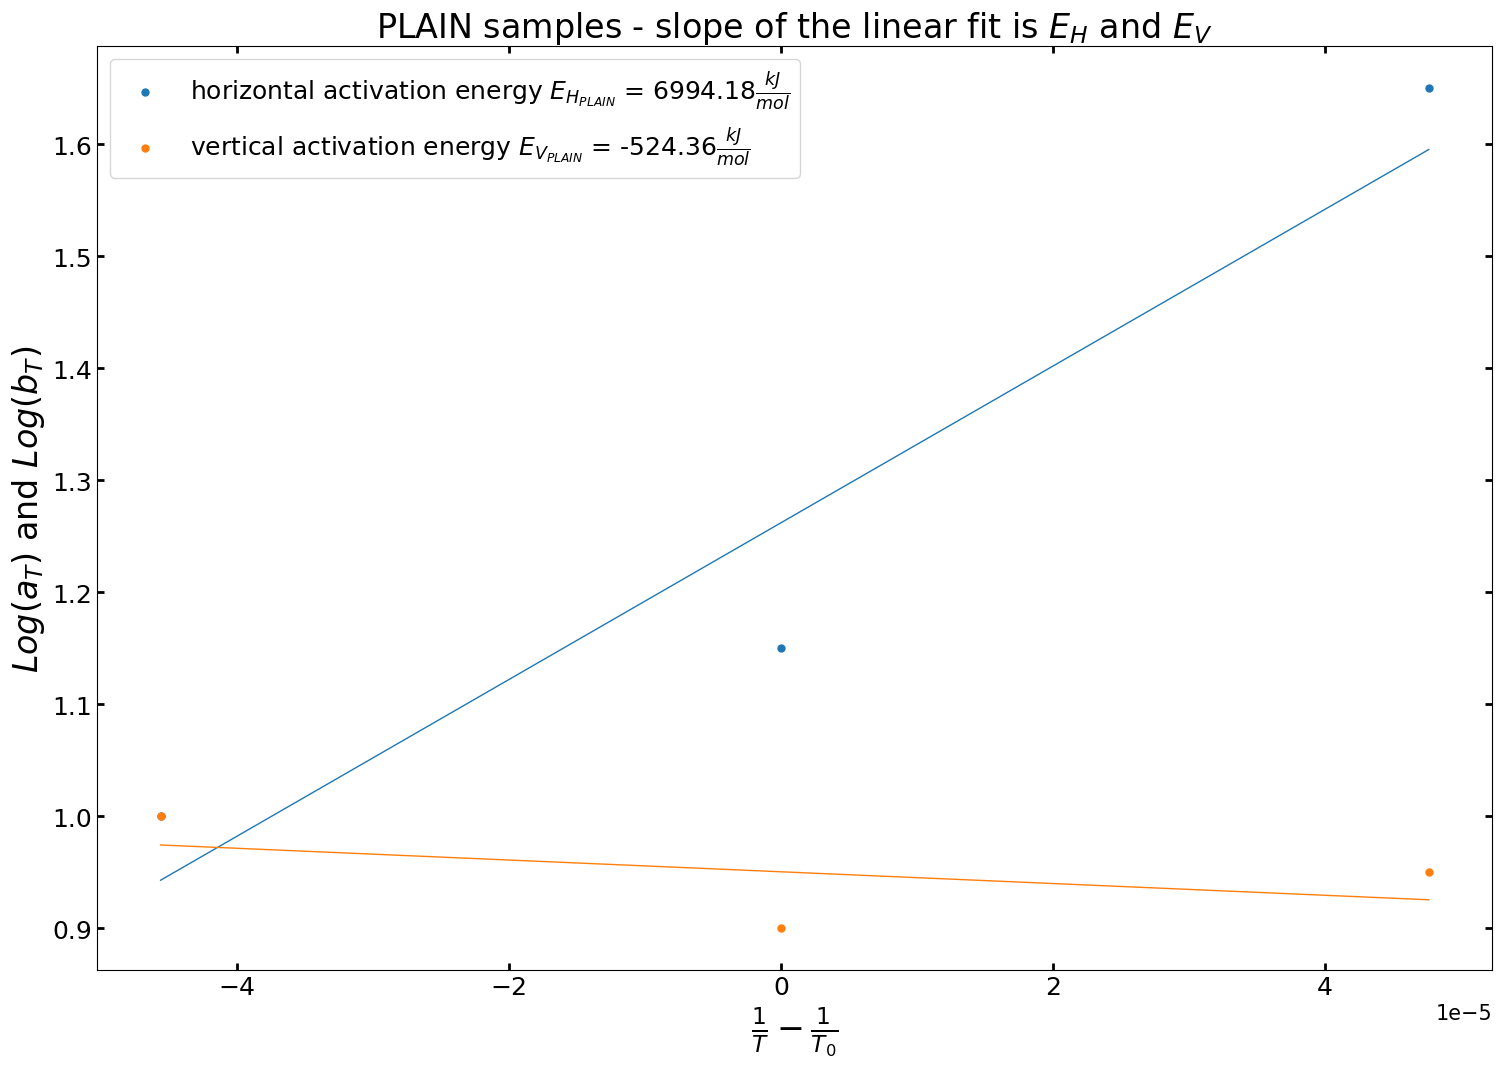

In [12]:
E_H_PLAIN, E_V_PLAIN = getActivationEnergies(0, 3, "PLAIN");

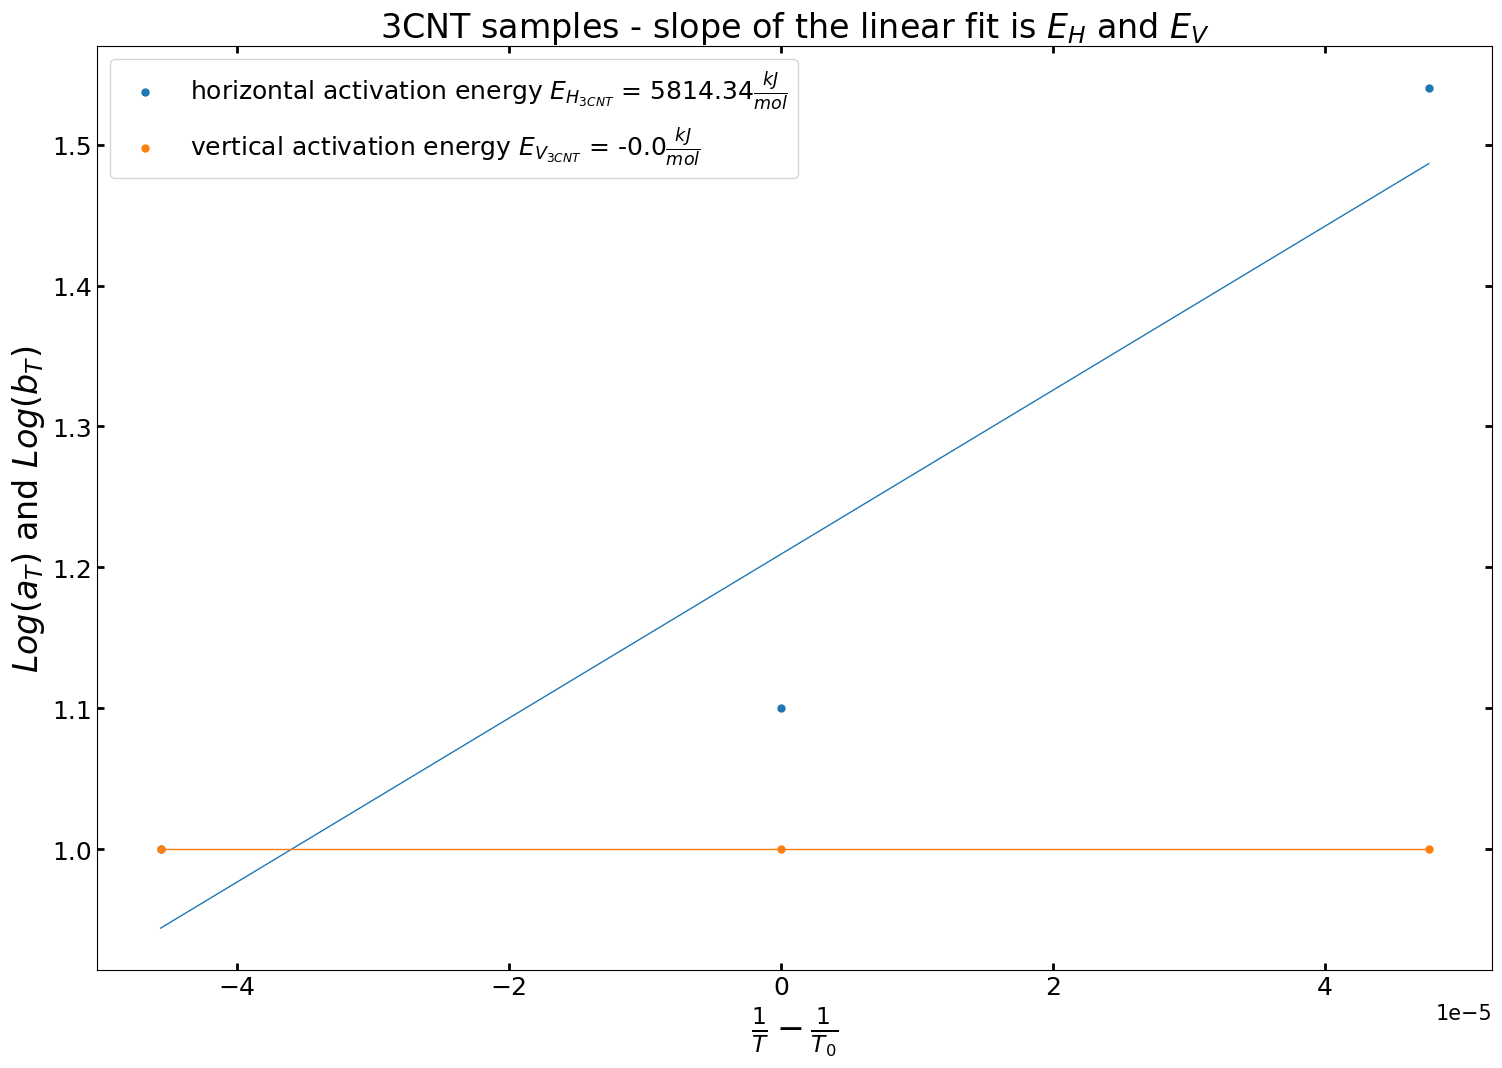

In [13]:
E_H_3CNT, E_V_3CNT = getActivationEnergies(3, 6, "3CNT");

---
### Compute the shift factor $a_T$ for arbitrary temperatures with the Williams-Landell-Ferry (WLF) equation $$ a_T = \exp \left[ E_H \left( \frac{1}{T} - \frac{1}{T_0} \right) \right] $$ $$ b_T = \exp \left[ E_V \left( \frac{1}{T} - \frac{1}{T_0} \right) \right] $$

In [14]:
def _WLF(E, T_K, T_K_0):
    return np.exp(E*_invT(T_K, T_K_0));

T_K_0 = T_K[len(T_K)-1]

# WLF PLAIN SAMPLES
a_T_temp = _WLF(E_H_PLAIN, T_Kref, T_K_0)
b_T_temp = _WLF(E_V_PLAIN, T_Kref, T_K_0)
a_T      = a_T.append(pd.Series(a_T_temp));
b_T      = b_T.append(pd.Series([b_T_temp]));

# WLF 3CNT SAMPLES
a_T_temp = _WLF(E_H_3CNT, T_Kref, T_K_0)
b_T_temp = _WLF(E_V_3CNT, T_Kref, T_K_0)
a_T      = a_T.append(pd.Series([a_T_temp]));
b_T      = b_T.append(pd.Series([b_T_temp]));

display('a_T'); display(a_T);
display('b_T'); display(b_T);
display('T_C'); display(T_C);

'a_T'

0    1.650000
1    1.150000
2    1.000000
3    1.540000
4    1.100000
5    1.000000
0    1.175022
0    1.143484
dtype: float64

'b_T'

0    0.950000
1    0.900000
2    1.000000
3    1.000000
4    1.000000
5    1.000000
0    0.987981
0    1.000000
dtype: float64

'T_C'

0    180
1    190
2    200
3    180
4    190
5    200
6    195
7    195
dtype: int64

---
### Compute the shifted complex modulus for $T = 195°C$

./data.csv


,3CNT_180_complexModulus,3CNT_180_complexViscosity,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_shiftedTo195_AngularFrequency,3CNT_180_shiftedTo195_ComplexModulus,3CNT_180_shiftedTo200_AngularFrequency,3CNT_180_shiftedTo200_ComplexModulus,3CNT_180_tanDelta,3CNT_190_complexModulus,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_shiftedTo195_AngularFrequency,3CNT_190_shiftedTo195_ComplexModulus,3CNT_190_shiftedTo200_AngularFrequency,3CNT_190_shiftedTo200_ComplexModulus,3CNT_190_tanDelta,3CNT_195_shiftedTo195_AngularFrequency,3CNT_195_shiftedTo195_ComplexModulus,3CNT_200_complexModulus,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_shiftedTo195_AngularFrequency,3CNT_200_shiftedTo195_ComplexModulus,3CNT_200_shiftedTo200_AngularFrequency,3CNT_200_shiftedTo200_ComplexModulus,3CNT_200_tanDelta,plain_180_complexModulus,plain_180_experiment_angularFrequency,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_shiftedTo195_AngularFrequency,plain_180_shiftedTo195_ComplexModulus,plain_180_shiftedTo200_AngularFrequency,plain_180_shiftedTo200_ComplexModulus,plain_180_tanDelta,plain_190_complexModulus,plain_190_experiment_angularFrequency,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_shiftedTo195_AngularFrequency,plain_190_shiftedTo195_ComplexModulus,plain_190_shiftedTo200_AngularFrequency,plain_190_shiftedTo200_ComplexModulus,plain_190_tanDelta,plain_195_shiftedTo195_AngularFrequency,plain_195_shiftedTo195_ComplexModulus,plain_200_complexModulus,plain_200_experiment_angularFrequency,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_shiftedTo195_AngularFrequency,plain_200_shiftedTo195_ComplexModulus,plain_200_shiftedTo200_AngularFrequency,plain_200_shiftedTo200_ComplexModulus,plain_200_tanDelta
0,154640.744954,246.243224,628.0,92400,124000,1184.878419,146908.707707,1036.20,146908.707707,0.745161,142189.169770,628.0,87600,21.717405,515.174657,112000,825.824352,127970.252793,722.20,127970.252793,0.782143,718.108132,126283.807355,126283.807355,628.0,79400,98200,718.108132,126283.807355,628.0,126283.807355,0.808554,164786.043098,628.0,61200,153000,1136.387612,162805.454321,967.12,164786.043098,0.400000,154706.043838,628.0,61400,27.256410,2003.813948,142000,811.705437,152846.608121,690.8,154706.043838,0.432394,737.914034,148631.235643,150439.389789,628.0,59900,138000,737.914034,148631.235643,628.0,150439.389789,0.434058
1,152981.338731,243.600858,628.0,92300,122000,1184.878419,145332.271795,1036.20,145332.271795,0.756557,141402.828826,628.0,87600,48.560043,435.208292,111000,825.824352,127262.545943,722.20,127262.545943,0.789189,718.108132,125275.576231,125275.576231,628.0,79400,96900,718.108132,125275.576231,628.0,125275.576231,0.819401,162855.764405,628.0,61000,151000,1136.387612,160898.375945,967.12,162855.764405,0.403974,153550.122110,628.0,60800,60.966959,1204.532913,141000,811.705437,151704.579594,690.8,153550.122110,0.431206,737.914034,145598.378988,147369.637307,628.0,59100,135000,737.914034,145598.378988,628.0,147369.637307,0.437778
2,139525.660722,269.354557,518.0,87100,109000,977.336020,132549.377686,854.70,132549.377686,0.799083,126105.709625,518.0,81300,109.500057,308.622497,96400,681.173590,113495.138662,595.70,113495.138662,0.843361,592.324861,112519.953786,112519.953786,518.0,74300,84500,592.324861,112519.953786,518.0,112519.953786,0.879290,153884.664603,518.0,59300,142000,937.338826,152035.101170,797.72,153884.664603,0.417606,144667.342548,518.0,59200,137.084299,701.660492,132000,669.527733,142928.563525,569.8,144667.342548,0.448485,608.661575,133646.787822,135272.650599,518.0,56300,123000,608.661575,133646.787822,518.0

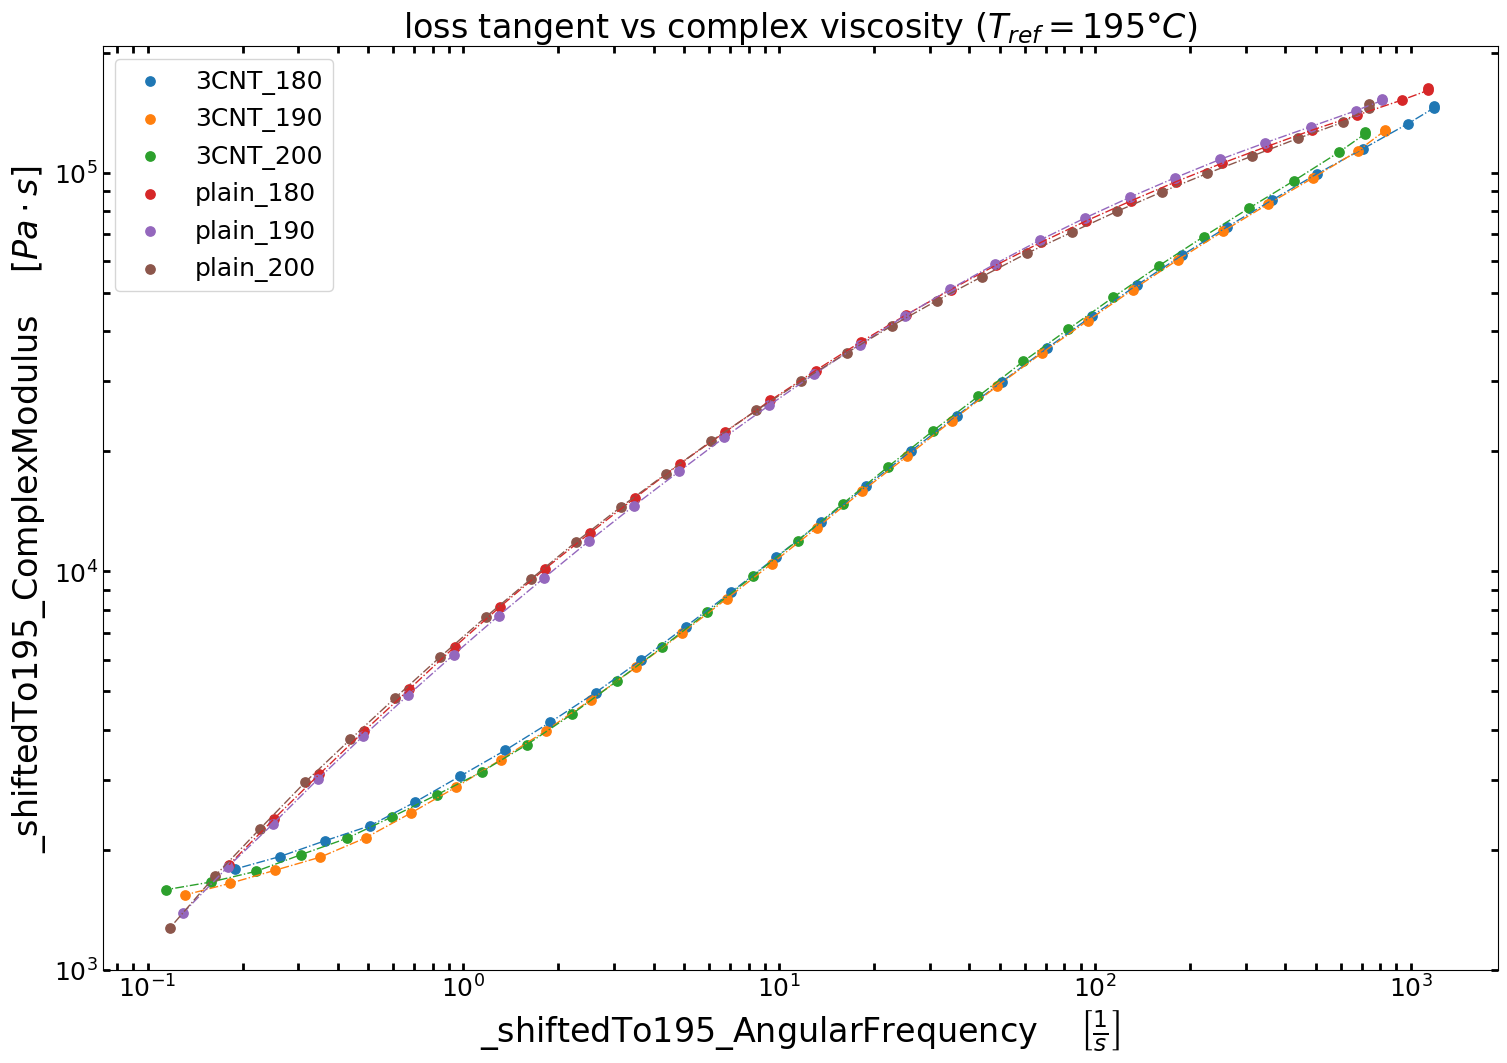

In [19]:
# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        if "plain" in sample_id:
            #sampleSeries = "plain_195"
            index = -2
        elif "3CNT" in sample_id:
            #sampleSeries = "3CNT_195"
            index = -1

        a = float(a_T.take([index]))
        b = float(b_T.take([index]))
        
        df[sample_id + "_shiftedTo195_AngularFrequency"] = df[sample_id + "_shiftedTo200_AngularFrequency"] * a;
        df[sample_id + "_shiftedTo195_ComplexModulus"] = df[sample_id + "_shiftedTo200_ComplexModulus"] * b;

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

plot_eachTemperatureCurve(
    "loss tangent vs complex viscosity (" + r'$T_{ref} = 195°C$' + ")",
    "_shiftedTo195_AngularFrequency", r'$\left[ \frac{1}{s} \right]$',
    "_shiftedTo195_ComplexModulus", r'$\left[ Pa \cdot s \right]$')

---
### Compute $$ \eta^*(\omega) = \frac{G^*(\omega)}{\omega} $$

./data.csv


,3CNT_180_complexModulus,3CNT_180_complexViscosity,3CNT_180_experiment_angularFrequency,3CNT_180_experiment_complexViscosity,3CNT_180_experiment_lossModulus,3CNT_180_experiment_storageModulus,3CNT_180_shiftedTo195_AngularFrequency,3CNT_180_shiftedTo195_ComplexModulus,3CNT_180_shiftedTo195_ComplexViscosity,3CNT_180_shiftedTo200_AngularFrequency,3CNT_180_shiftedTo200_ComplexModulus,3CNT_180_tanDelta,3CNT_190_complexModulus,3CNT_190_experiment_angularFrequency,3CNT_190_experiment_complexViscosity,3CNT_190_experiment_lossModulus,3CNT_190_experiment_shearRate,3CNT_190_experiment_shearViscosity,3CNT_190_experiment_storageModulus,3CNT_190_shiftedTo195_AngularFrequency,3CNT_190_shiftedTo195_ComplexModulus,3CNT_190_shiftedTo195_ComplexViscosity,3CNT_190_shiftedTo195_ShearRate,3CNT_190_shiftedTo200_AngularFrequency,3CNT_190_shiftedTo200_ComplexModulus,3CNT_190_tanDelta,3CNT_195_shiftedTo195_AngularFrequency,3CNT_195_shiftedTo195_ComplexModulus,3CNT_200_complexModulus,3CNT_200_experiment_angularFrequency,3CNT_200_experiment_complexViscosity,3CNT_200_experiment_lossModulus,3CNT_200_experiment_storageModulus,3CNT_200_shiftedTo195_AngularFrequency,3CNT_200_shiftedTo195_ComplexModulus,3CNT_200_shiftedTo195_ComplexViscosity,3CNT_200_shiftedTo200_AngularFrequency,3CNT_200_shiftedTo200_ComplexModulus,3CNT_200_tanDelta,plain_180_complexModulus,plain_180_experiment_angularFrequency,plain_180_experiment_complexViscosity,plain_180_experiment_lossModulus,plain_180_experiment_storageModulus,plain_180_shiftedTo195_AngularFrequency,plain_180_shiftedTo195_ComplexModulus,plain_180_shiftedTo195_ComplexViscosity,plain_180_shiftedTo200_AngularFrequency,plain_180_shiftedTo200_ComplexModulus,plain_180_tanDelta,plain_190_complexModulus,plain_190_experiment_angularFrequency,plain_190_experiment_complexViscosity,plain_190_experiment_lossModulus,plain_190_experiment_shearRate,plain_190_experiment_shearViscosity,plain_190_experiment_storageModulus,plain_190_shiftedTo195_AngularFrequency,plain_190_shiftedTo195_ComplexModulus,plain_190_shiftedTo195_ComplexViscosity,plain_190_shiftedTo195_ShearRate,plain_190_shiftedTo200_AngularFrequency,plain_190_shiftedTo200_ComplexModulus,plain_190_tanDelta,plain_195_shiftedTo195_AngularFrequency,plain_195_shiftedTo195_ComplexModulus,plain_200_complexModulus,plain_200_experiment_angularFrequency,plain_200_experiment_complexViscosity,plain_200_experiment_lossModulus,plain_200_experiment_storageModulus,plain_200_shiftedTo195_AngularFrequency,plain_200_shiftedTo195_ComplexModulus,plain_200_shiftedTo195_ComplexViscosity,plain_200_shiftedTo200_AngularFrequency,plain_200_shiftedTo200_ComplexModulus,plain_200_tanDelta
0,154640.744954,246.243224,628.0,246.243224,92400,124000,1184.878419,146908.707707,123.986314,1036.20,146908.707707,0.745161,142189.169770,628.0,226.415875,87600,21.717405,515.174657,112000,825.824352,127970.252793,154.960619,45.606550,722.20,127970.252793,0.782143,718.108132,126283.807355,126283.807355,628.0,201.088865,79400,98200,718.108132,126283.807355,175.856256,628.0,126283.807355,0.808554,164786.043098,628.0,262.398158,61200,153000,1136.387612,162805.454321,143.265777,967.12,164786.043098,0.400000,154706.043838,628.0,246.347204,61400,27.256410,2003.813948,142000,811.705437,152846.608121,188.303048,23.713077,690.8,154706.043838,0.432394,737.914034,148631.235643,150439.389789,628.0,239.553168,59900,138000,737.914034,148631.235643,201.420801,628.0,150439.389789,0.434058
1,152981.338731,243.600858,628.0,243.600858,92300,122000,1184.878419,145332.271795,122.655852,1036.20,145332.271795,0.756557,141402.828826,628.0,225.163740,87600,48.560043,435.208292,111000,825.824352,127262.545943,154.103649,101.976091,722.20,127262.545943,0.789189,718.108132,125275.576231,125275.576231,628.0,199.483402,79400,96900,718.108132,125275.576231,174.452246,628.0,125275.576231,0.819401,162855.764405,628.0,259.324466,61000,151000,1136.387612,160898.375945,141.587584,967.12,162855.764405,0.403974,153550.122110,628.0,244.506564,60800,60.966959,12

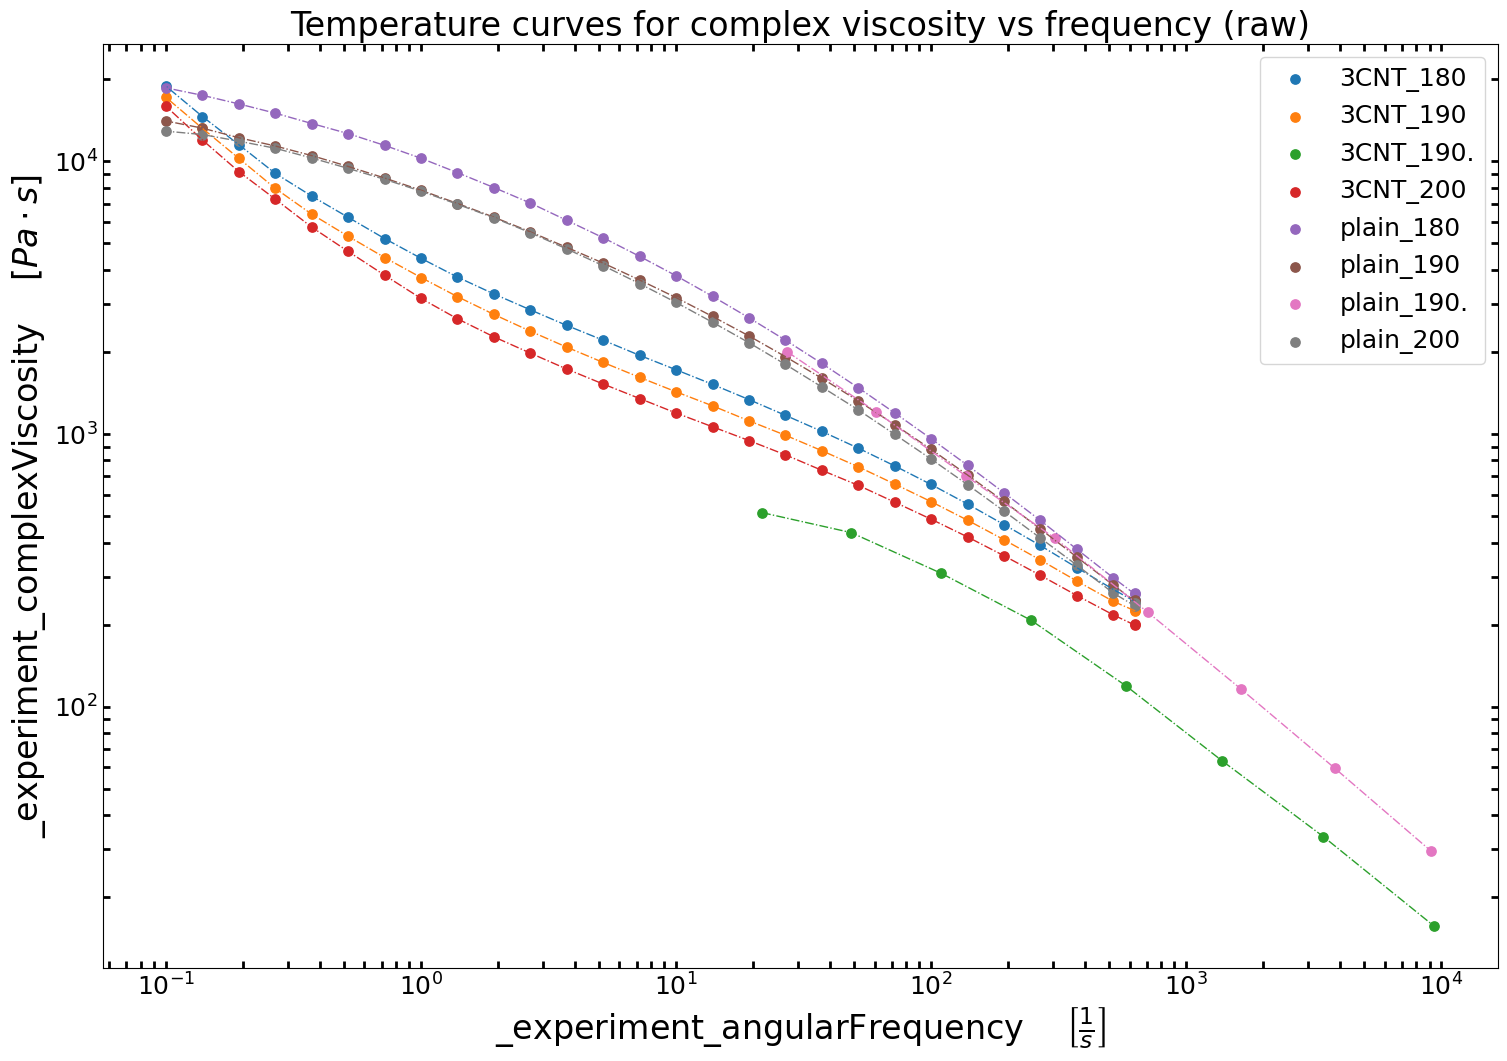

In [34]:
def _etac(G2, w):
    etac = G2/w;
    return etac;

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = df.columns[i].split('_')[0] + "_" + df.columns[i].split('_')[1];
        
        # Compute Complex Viscosity
        df[sample_id + "_experiment_complexViscosity"] = _etac(df[sample_id + "_complexModulus"], df[sample_id + "_experiment_angularFrequency"]);
        df[sample_id + "_shiftedTo195_ComplexViscosity"] = _etac(df[sample_id + "_shiftedTo195_ComplexModulus"], df[sample_id + "_shiftedTo195_AngularFrequency"]);
        
df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df.head());
#display(pd.Series(df.columns));

plot_eachTemperatureCurve(
    "Temperature curves for complex viscosity vs frequency (raw)",
    "_experiment_angularFrequency", r'$\left[ \frac{1}{s} \right]$',
    "_experiment_complexViscosity", r'$[Pa \cdot s]$')

---
### Plot with all shifts to get the master curve at $195°C$

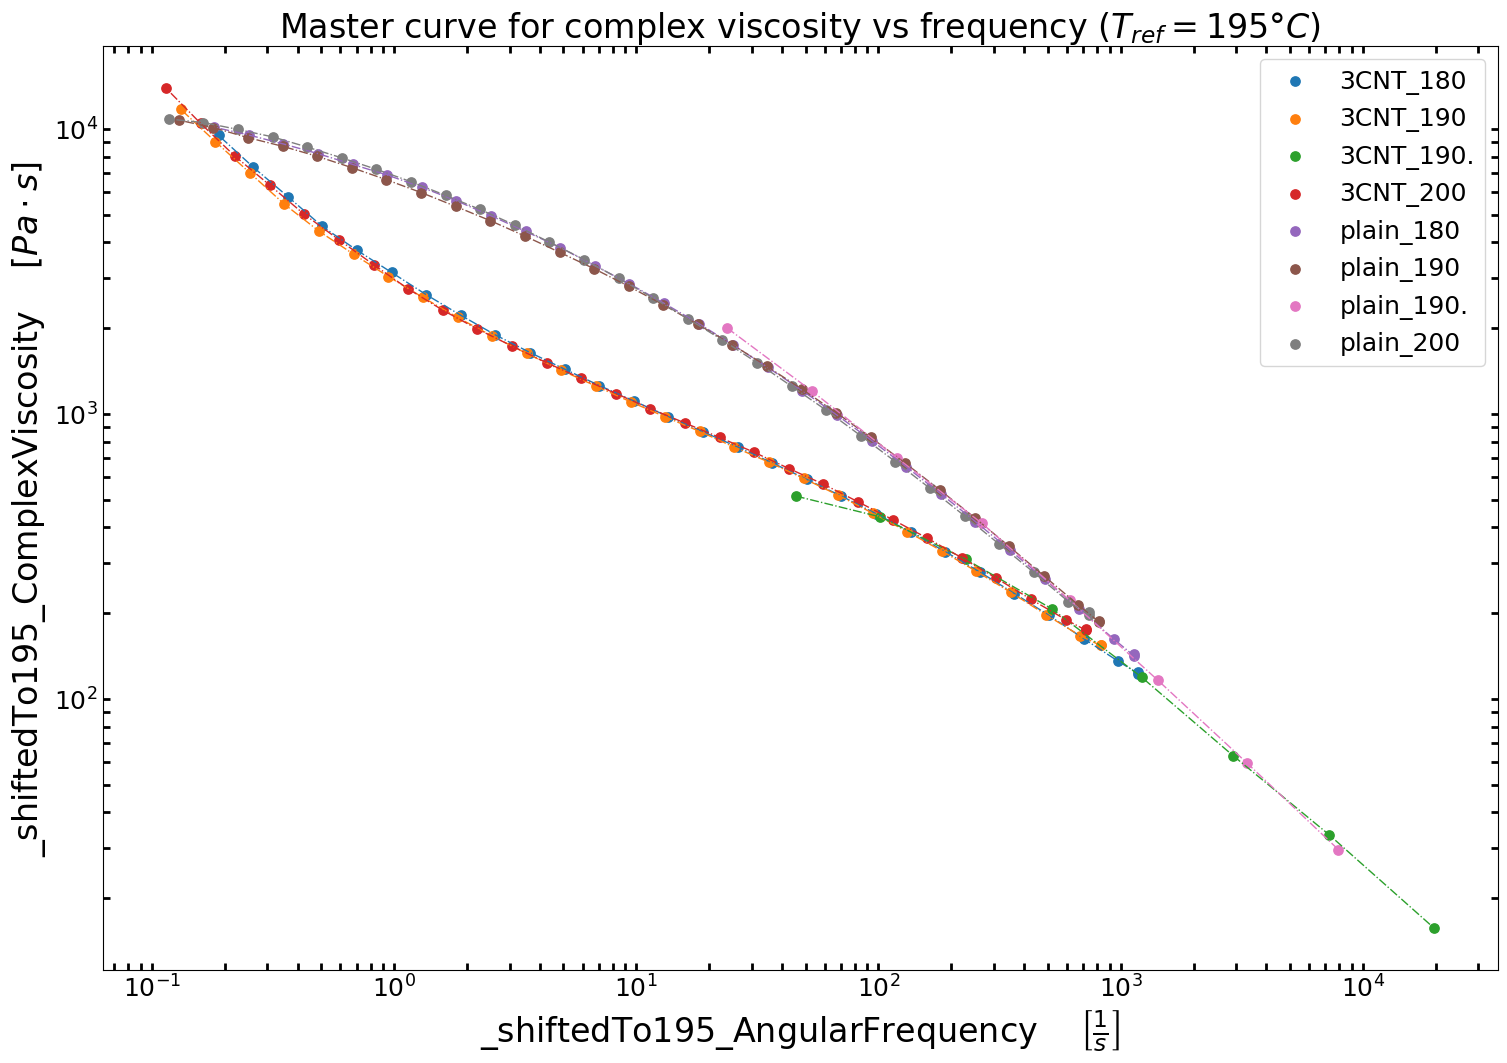

In [33]:
df["3CNT_190_shiftedTo195_ShearRate"]  = df["3CNT_190_experiment_shearRate"] * 2.10
df["plain_190_shiftedTo195_ShearRate"] = df["plain_190_experiment_shearRate"] * 0.87

plot_eachTemperatureCurve(
    "Master curve for complex viscosity vs frequency (" + r'$T_{ref} = 195°C$' + ")",
    "_shiftedTo195_AngularFrequency", r'$\left[ \frac{1}{s} \right]$',
    "_shiftedTo195_ComplexViscosity", r'$[Pa \cdot s]$')

---
### Merge all the master curve data points into a single dataframe

In [ ]:
'''
threeCNT_200_masterAngularFrequency = pd.Series([]);
threeCNT_200_masterComplexViscosity = pd.Series([]);

PLAIN_200_masterAngularFrequency = pd.Series([]);
PLAIN_200_masterComplexViscosity = pd.Series([]);

for i in range(len(df.columns)):
    if ("storageModulus" in df.columns[i]):
        sample_id = "_" + df.columns[i].split('_')[1];
        
        # Store master curve
        threeCNT_masterAngularFrequency = \
        threeCNT_masterAngularFrequency.append(df["3CNT" + sample_id + "_shiftedAngularFrequency"]);
        threeCNT_masterComplexViscosity = \
        threeCNT_masterComplexViscosity.append(df["3CNT" + sample_id + "_ShiftedComplexViscosity"]);
        
# Sort data
threeCNT_masterAngularFrequency = threeCNT_masterAngularFrequency.reset_index(drop=True)
threeCNT_masterComplexViscosity = threeCNT_masterComplexViscosity.reset_index(drop=True)
threeCNT_mastercurve = pd.DataFrame()
threeCNT_mastercurve['freq_200'] = pd.Series(threeCNT_masterAngularFrequency)
threeCNT_mastercurve['eta_200']  = pd.Series(threeCNT_masterComplexViscosity)
threeCNT_mastercurve = threeCNT_mastercurve.sort_values('freq')
'''

In [ ]:
'''
# Set plot size and axis labels' font size
pltname = "complex viscosity vs frequency @different temperatures";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca();

# Scatter the data and plot a curve to join the points
print(np.array(T_C))

# Extract data from the 3CNT Sample Series
T = float(T_C.take([-2])); a = float(a_T.take([-2])); b = float(b_T.take([-2]));
print(T, a, b)
threeCNT_mastercurve['freq_200'] * a;
threeCNT_mastercurve['eta_200'] * b;
plt.scatter(x, y, s=25, marker='o');
plt.plot(x, y, linewidth=2, linestyle='-.', label=r'$T = $' + str(T) + '$ °C$');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
x_units = r'$\left[ \frac{1}{s} \right]$'
y_units = r'$[Pa \cdot s]$'
ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$\eta^*(\omega)$' + '    ' + y_units, fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults
'''